In [36]:
import xarray as xr
import numpy as np
import matplotlib.pylab as plt
import cartopy.crs as ccrs
import argopy
from argopy import DataFetcher as ArgoDataFetcher
argo_loader = ArgoDataFetcher()
import cmocean

In [37]:
float_sel = [6901199, 3901602, 5905033, 5904640, 1902024, 5905051]
levels = list(range(0, 1000))


afloat = argo_loader.float(float_sel[4]).to_xarray()
afloat_prof = afloat.argo.point2profile()
afloat_interp = afloat_prof.argo.interp_std_levels(levels)

In [ ]:
#Examples from 10 June 2022 meeting with Julius
#Use these to define function

salinity = afloat_interp.PSAL
salinity_anom = salinity - salinity.mean('N_PROF')
plt.rcParams['font.size'] = '30'

#Map of float path
fig = plt.figure(figsize=(50,30))
ax = fig.add_subplot(2, 3, 1, projection=ccrs.Robinson())
ax.set_global()
ax.coastlines()
ax.plot(afloat_interp.LONGITUDE, afloat_interp.LATITUDE, transform=ccrs.PlateCarree())
plt.title("Trajectory, Float #{}".format(int(afloat_prof.PLATFORM_NUMBER[0])))

#Salinity profile
plt.subplot(2,3,2)
afloat_interp.isel(N_PROF=0).PSAL.plot(y='PRES_INTERPOLATED', yincrease=False)
plt.title("Salinity Profile, Float #{}".format(int(afloat_prof.PLATFORM_NUMBER[0])))

#Salinity colormesh
plt.subplot(2,3,3)
salinity.plot(x='N_PROF', yincrease=False)
plt.title("Salinity Colormesh, Float #{}".format(int(afloat_prof.PLATFORM_NUMBER[0])))

#Salinity anomaly
plt.subplot(2,3,4)
salinity_anom.plot(x='N_PROF', yincrease=False)
plt.title("Salinity Anomaly, Float #{}".format(int(afloat_prof.PLATFORM_NUMBER[0])))

#Salinity vertical anomaly
plt.subplot(2,3,5)
salinity_vert = salinity.diff('PRES_INTERPOLATED')
salinity_vert.plot(x='N_PROF', yincrease=False, robust=True)
plt.title("Salinity Vertical Anomaly, Float #{}".format(int(afloat_prof.PLATFORM_NUMBER[0])))

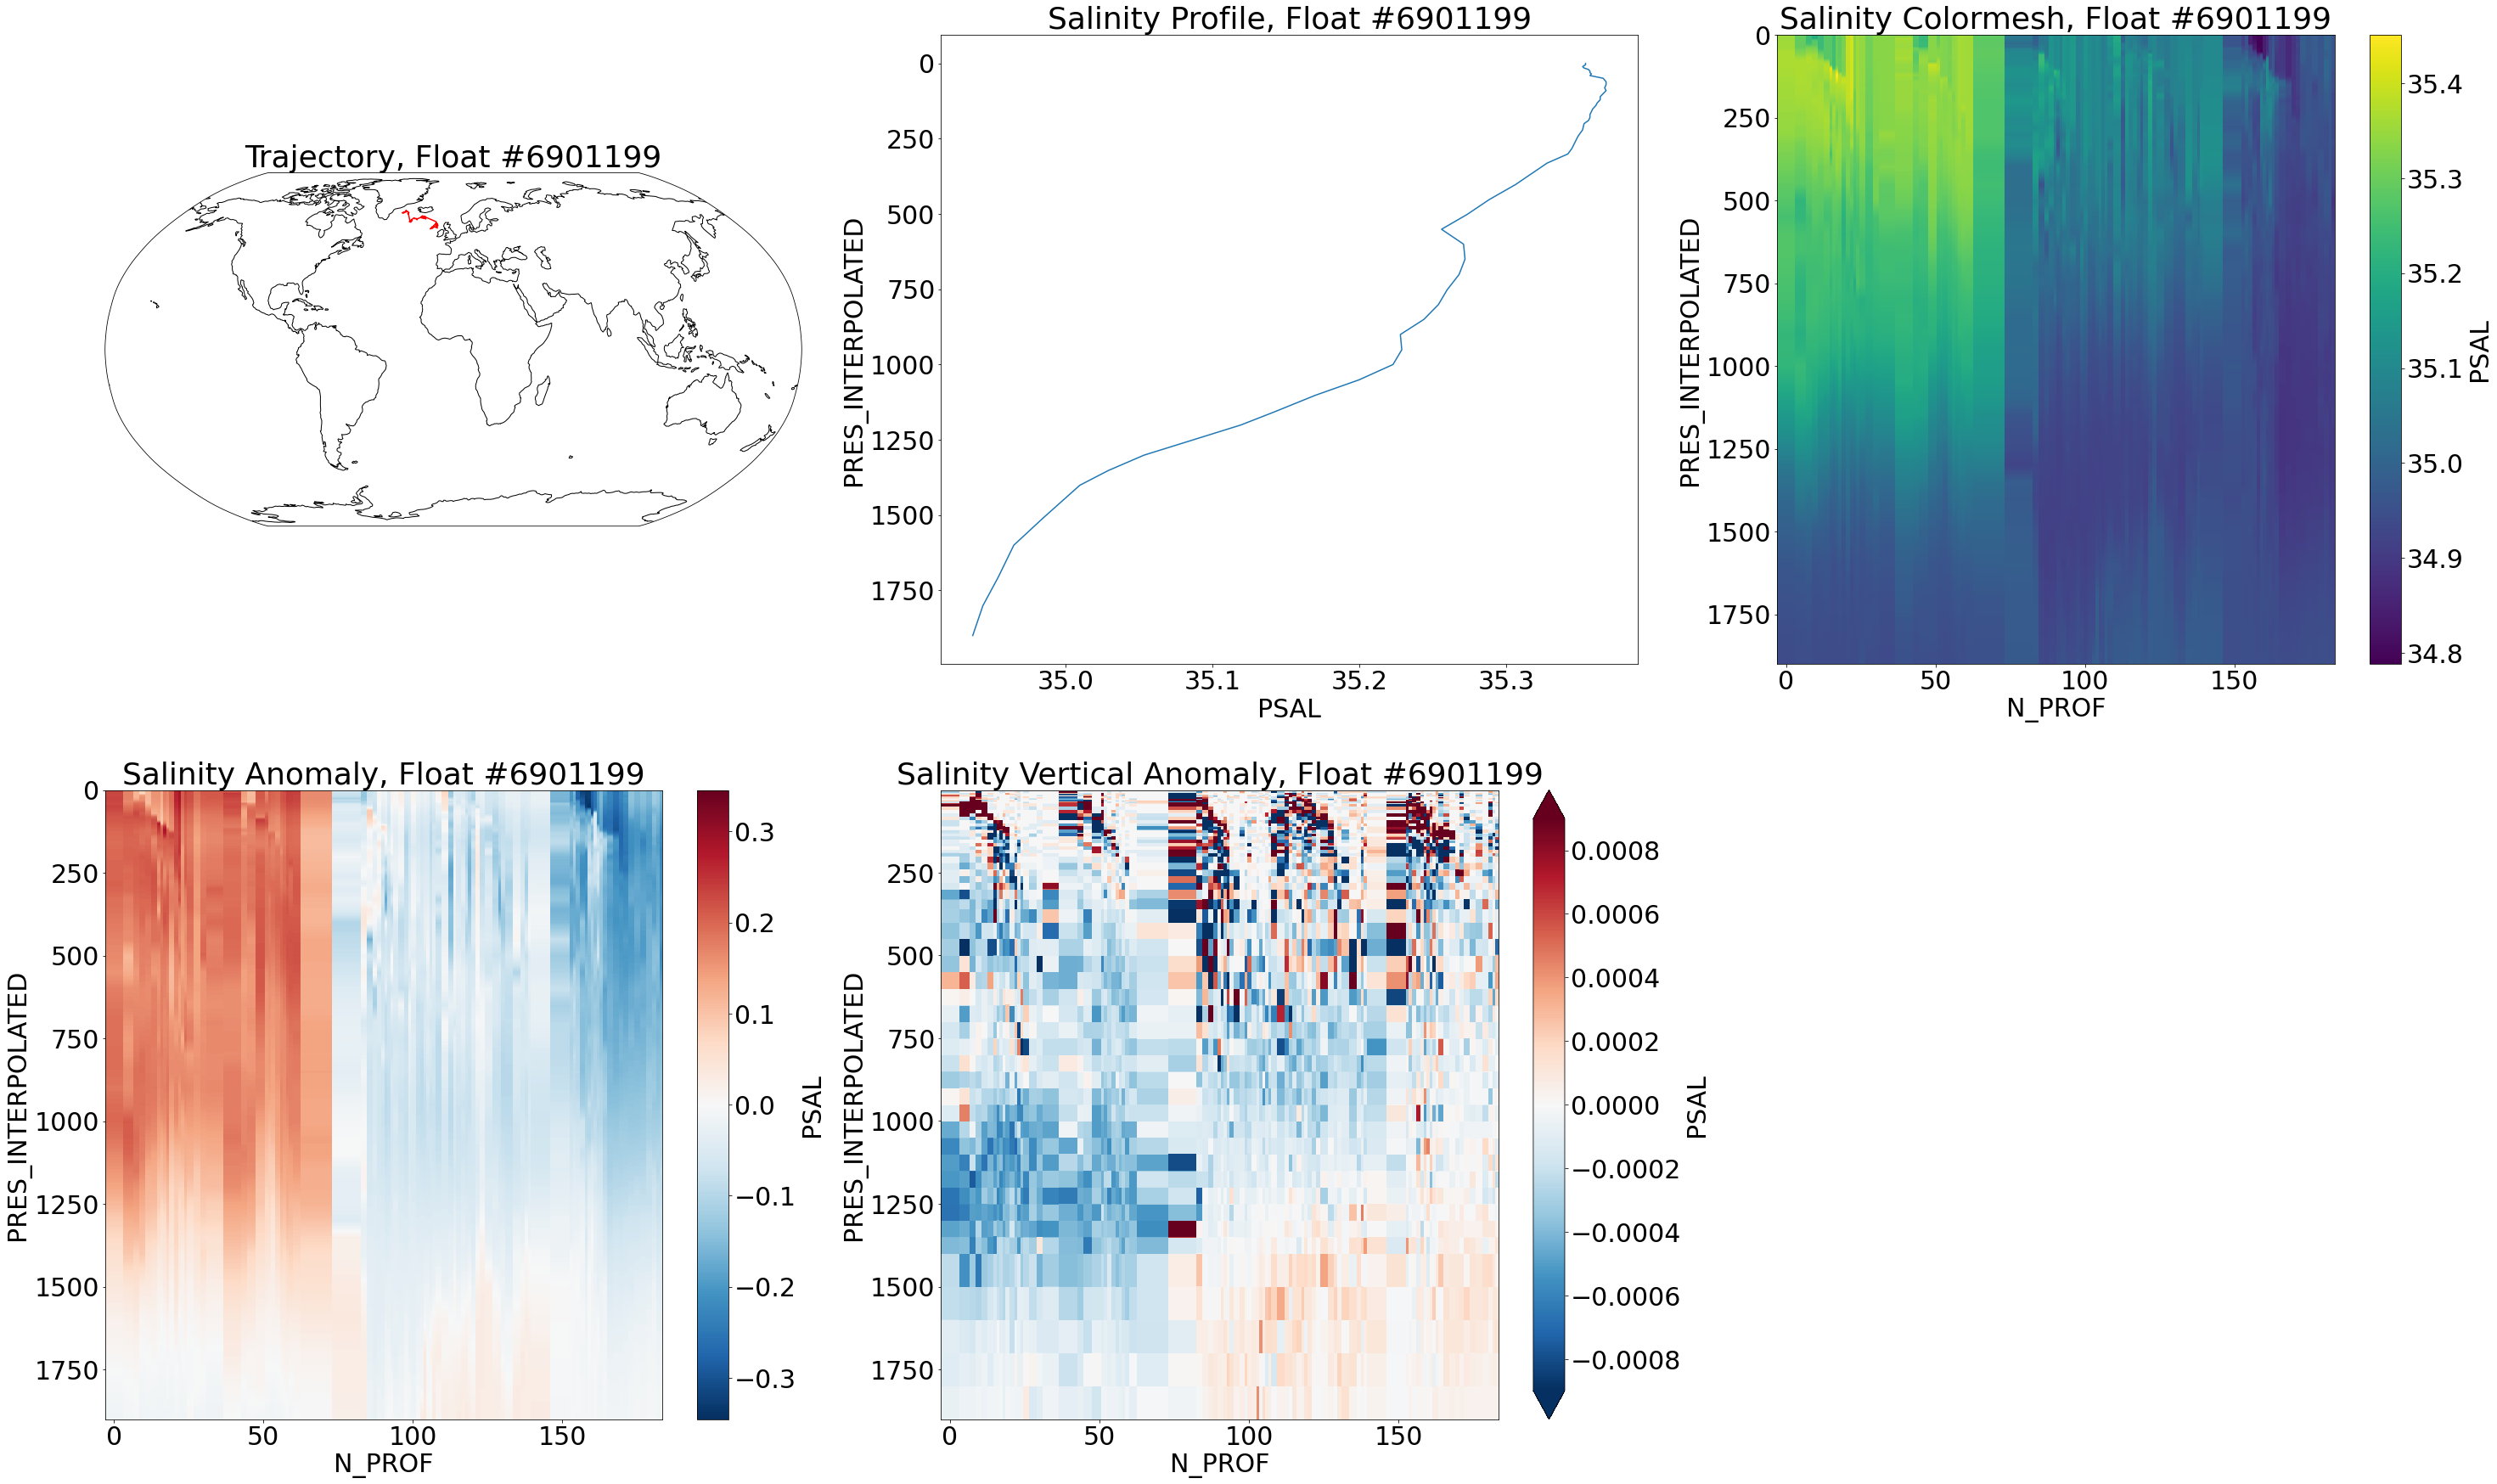

In [39]:
def sal_plots(float_id):
    afloat = argo_loader.float(float_id).to_xarray()
    afloat_prof = afloat.argo.point2profile()
    levels = list(range(0, int(np.max(afloat_prof.PRES))))
    afloat_interp = afloat_prof.argo.interp_std_levels(levels)
    
    salinity = afloat_interp.PSAL
    salinity_anom = salinity - salinity.mean('N_PROF')
    plt.rcParams['font.size'] = '30'
    
    plt.rcParams['font.size'] = '30'
    
    #Map of float path
    fig = plt.figure(figsize=(50,30))
    ax = fig.add_subplot(2, 3, 1, projection=ccrs.Robinson())
    ax.set_global()
    ax.coastlines()
    ax.plot(afloat_interp.LONGITUDE, afloat_interp.LATITUDE, transform=ccrs.PlateCarree(), color='r')
    plt.title("Trajectory, Float #{}".format(int(afloat_prof.PLATFORM_NUMBER[0])))

    #Salinity profile
    plt.subplot(2,3,2)
    afloat_interp.isel(N_PROF=0).PSAL.plot(y='PRES_INTERPOLATED', yincrease=False)
    plt.title("Salinity Profile, Float #{}".format(int(afloat_prof.PLATFORM_NUMBER[0])))

    #Salinity colormesh
    plt.subplot(2,3,3)
    salinity.plot(x='N_PROF', yincrease=False)
    plt.title("Salinity Colormesh, Float #{}".format(int(afloat_prof.PLATFORM_NUMBER[0])))

    #Salinity anomaly
    plt.subplot(2,3,4)
    salinity_anom.plot(x='N_PROF', yincrease=False)
    plt.title("Salinity Anomaly, Float #{}".format(int(afloat_prof.PLATFORM_NUMBER[0])))

    #Salinity vertical anomaly
    plt.subplot(2,3,5)
    salinity_vert = salinity.diff('PRES_INTERPOLATED')
    salinity_vert.plot(x='N_PROF', yincrease=False, robust=True)
    plt.title("Salinity Vertical Anomaly, Float #{}".format(int(afloat_prof.PLATFORM_NUMBER[0])))
    
    return

sal_plots(6901199)

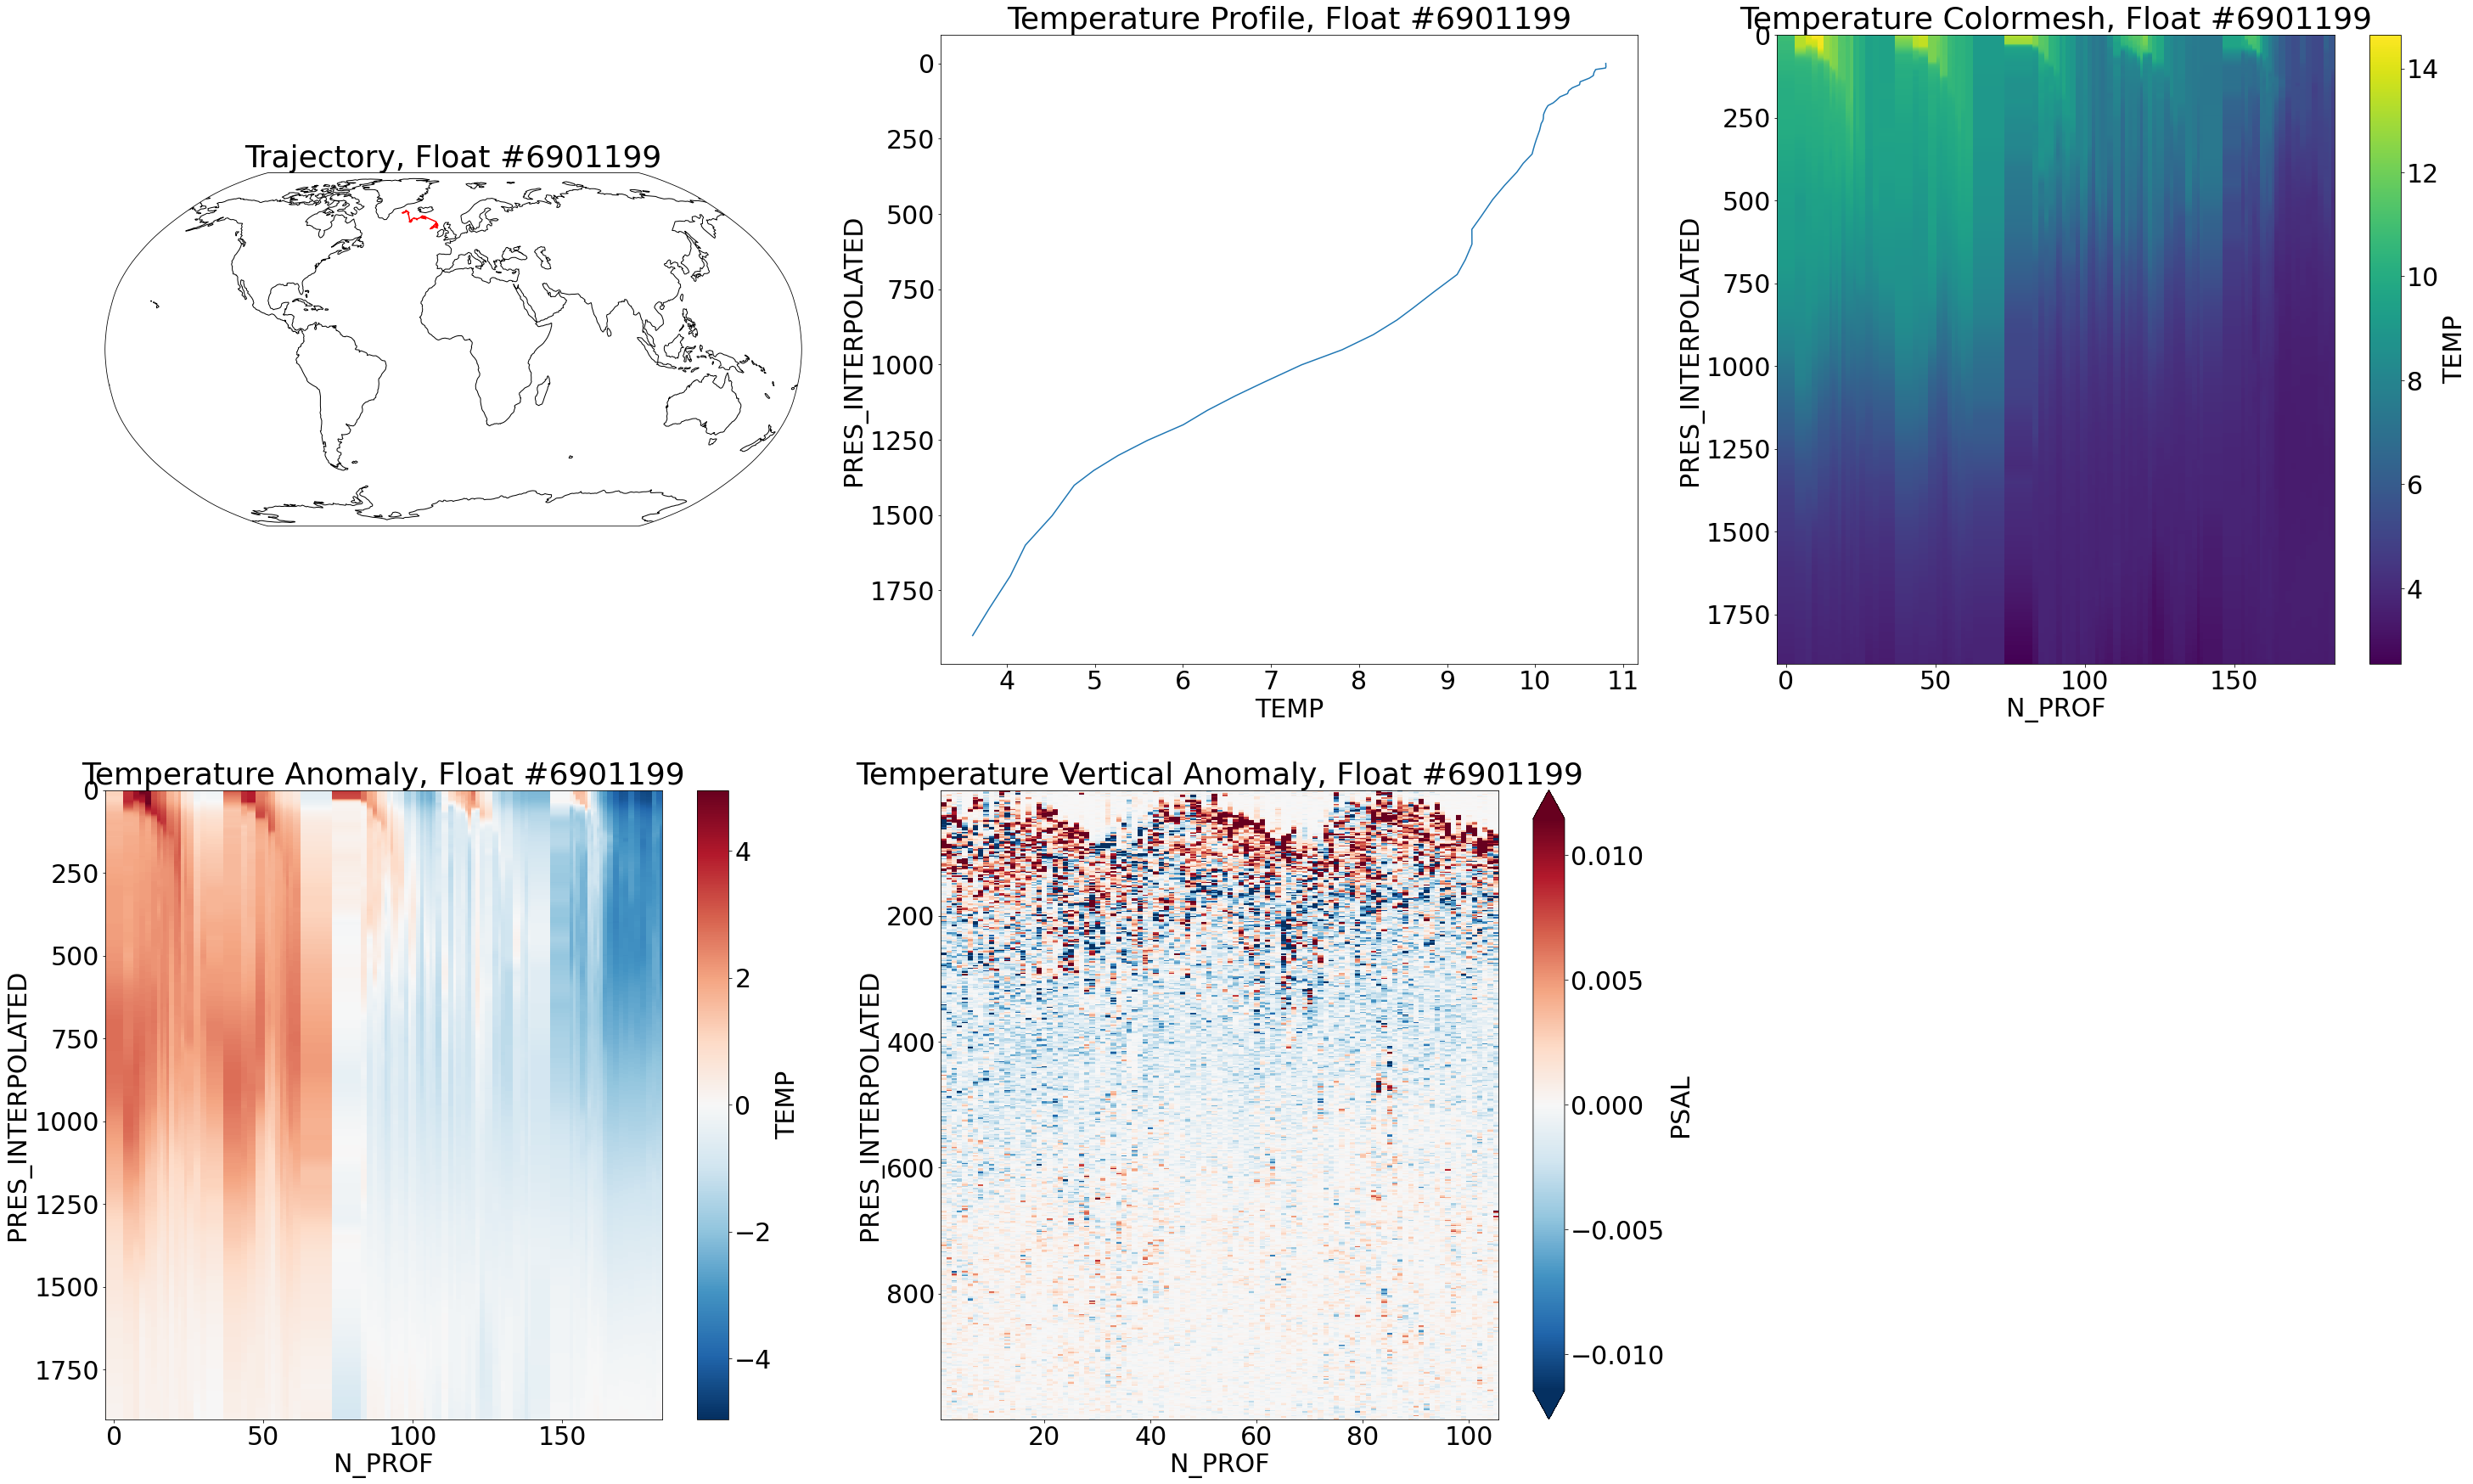

In [40]:
def temp_plots(float_id):
    afloat = argo_loader.float(float_id).to_xarray()
    afloat_prof = afloat.argo.point2profile()
    levels = list(range(0, int(np.max(afloat_prof.PRES))))
    afloat_interp = afloat_prof.argo.interp_std_levels(levels)
    
    temp = afloat_interp.TEMP
    temp_anom = temp - temp.mean('N_PROF')
    plt.rcParams['font.size'] = '30'
    
    #Map of float path
    fig = plt.figure(figsize=(50,30))
    ax = fig.add_subplot(2, 3, 1, projection=ccrs.Robinson())
    ax.set_global()
    ax.coastlines()
    ax.plot(afloat_interp.LONGITUDE, afloat_interp.LATITUDE, transform=ccrs.PlateCarree(), color='r')
    plt.title("Trajectory, Float #{}".format(int(afloat_prof.PLATFORM_NUMBER[0])))

    #Salinity profile
    plt.subplot(2,3,2)
    afloat_interp.isel(N_PROF=0).TEMP.plot(y='PRES_INTERPOLATED', yincrease=False)
    plt.title("Temperature Profile, Float #{}".format(int(afloat_prof.PLATFORM_NUMBER[0])))

    #Salinity colormesh
    plt.subplot(2,3,3)
    temp.plot(x='N_PROF', yincrease=False)
    plt.title("Temperature Colormesh, Float #{}".format(int(afloat_prof.PLATFORM_NUMBER[0])))

    #Salinity anomaly
    plt.subplot(2,3,4)
    temp_anom.plot(x='N_PROF', yincrease=False)
    plt.title("Temperature Anomaly, Float #{}".format(int(afloat_prof.PLATFORM_NUMBER[0])))

    #Salinity vertical anomaly
    plt.subplot(2,3,5)
    temp_vert = salinity.diff('PRES_INTERPOLATED')
    temp_vert.plot(x='N_PROF', yincrease=False, robust=True)
    plt.title("Temperature Vertical Anomaly, Float #{}".format(int(afloat_prof.PLATFORM_NUMBER[0])))
    
    return

temp_plots(6901199)

In [ ]:
#Examples from 10 June 2022 meeting with Julius
#Use these to define function

salinity = afloat_interp.PSAL
salinity_anom = salinity - salinity.mean('N_PROF')

plt.rcParams["figure.figsize"] = [20,10]
#plt.rcParams["figure.autolayout"] = True
plt.rcParams['font.size'] = '10'

ax = plt.GridSpec(3,2)
ax.update(wspace=0.5, hspace=0.5)

#ax1 = plt.subplot(ax[0,:])
fig = plt.figure(figsize=(40,20))
ax1 = fig.add_subplot(2,3,1,projection=ccrs.Robinson())
ax1.set_global()
ax1.coastlines()
ax1.plot(afloat_interp.LONGITUDE, afloat_interp.LATITUDE, transform=ccrs.PlateCarree())
plt.title("Trajectory, Float #{}".format(int(afloat_prof.PLATFORM_NUMBER[0])))

ax2 = plt.subplot(ax[1, 0])
afloat_interp.isel(N_PROF=0).PSAL.plot(y='PRES_INTERPOLATED', yincrease=False)
plt.title("Salinity Profile, Float #{}".format(int(afloat_prof.PLATFORM_NUMBER[0])))


ax3 = plt.subplot(ax[1, 1])
salinity.plot(x='N_PROF', yincrease=False)
plt.title("Salinity Colormesh, Float #{}".format(int(afloat_prof.PLATFORM_NUMBER[0])))

ax4 = plt.subplot(ax[2,0])
salinity_anom.plot(x='N_PROF', yincrease=False)
plt.title("Salinity Anomaly, Float #{}".format(int(afloat_prof.PLATFORM_NUMBER[0])))

ax5 = plt.subplot(ax[2,1])
salinity_vert = salinity.diff('PRES_INTERPOLATED')
salinity_vert.plot(x='N_PROF', yincrease=False, robust=True)
plt.title("Salinity Vertical Anomaly, Float #{}".format(int(afloat_prof.PLATFORM_NUMBER[0])))